In [35]:
import pandas as pd
import numpy as np



In [36]:
# Ruta del archivo CSV
dataset = r'C:\Users\Sebastian\Desktop\Birmingham dataset\dataset.csv'



In [37]:
# Leemos el archivo csv
df = pd.read_csv(dataset)

In [38]:
#Utilizamos el df.head para ver las columnas que tiene nuestro dataset
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [39]:
#Utilizamos el describe para ver ciertos datos estadisticos de las columnas numéricas
df.describe()

,Capacity,Occupancy
count,35717.000000,35717.000000
mean,1397.550130,642.228911
std,1179.326833,656.955535
min,220.000000,-8.000000
25%,500.000000,210.000000
50%,849.000000,446.000000
75%,2009.000000,798.000000
max,4675.000000,4327.000000


In [40]:
#Analizamos el total de filas del dataset
df.shape

(35717, 4)

In [41]:
#Verificamos si hay valores nulos y cuantos
df.isna().sum().sum()

0

In [42]:
#Ya que no tenemos valores nulos, no es necesario hacer un dropna, por lo tanto ahora veremos si hay duplicados
df.duplicated().sum()

216

In [43]:
df.drop_duplicates(keep='first',inplace=True) 

In [44]:
#Utilizamos el describe para ver ciertos datos estadisticos de las columnas numéricas
df.describe()

,Capacity,Occupancy
count,35501.000000,35501.000000
mean,1399.242613,644.853582
std,1179.939451,657.822376
min,220.000000,-8.000000
25%,500.000000,212.000000
50%,863.000000,448.000000
75%,2009.000000,802.000000
max,4675.000000,4327.000000


In [45]:
df.dtypes

SystemCodeNumber    object
Capacity             int64
Occupancy            int64
LastUpdated         object
dtype: object

In [56]:
#Agregamos columnas nuevas que pueden servir en nuestro análisis
df.LastUpdated = df.LastUpdated.astype('datetime64')
df['Porcentaje_de_ocupación'] = df.Occupancy / df.Capacity
df['Fecha'] = df.LastUpdated.dt.date
df['Día_de_la_semana'] = df.LastUpdated.dt.dayofweek
df['Media_hora_exacta'] = df.LastUpdated.dt.round('30min')
df['time'] = df.Media_hora_exacta.dt.time

In [54]:
df.head(10)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Porcentaje_de_ocupación,Fecha,Día_de_la_semana,Media_hora_exacta
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,0.105719,2016-10-04,1,2016-10-04 08:00:00
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,0.110919,2016-10-04,1,2016-10-04 08:30:00
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,0.138648,2016-10-04,1,2016-10-04 09:00:00
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,0.185442,2016-10-04,1,2016-10-04 09:30:00
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,0.259965,2016-10-04,1,2016-10-04 10:00:00
5,BHMBCCMKT01,577,177,2016-10-04 10:26:49,0.306759,2016-10-04,1,2016-10-04 10:30:00
6,BHMBCCMKT01,577,219,2016-10-04 10:59:48,0.379549,2016-10-04,1,2016-10-04 11:00:00
7,BHMBCCMKT01,577,247,2016-10-04 11:25:47,0.428076,2016-10-04,1,2016-10-04 11:30:00
8,BHMBCCMKT01,577,259,2016-10-04 11:59:44,0.448873,2016-10-04,1,2016-10-04 12:00:00
9,BHMBCCMKT01,577,266,2016-10-04 12:29:45,0.461005,2016-10-04,1,2016-10-04 12:30:00


In [58]:
#Calculamos el % de ocupación total del dataset
suma_occupancy = df['Occupancy'].sum()
suma_capacity = df['Capacity'].sum()
porcentaje_ocupacion_total = (suma_occupancy / suma_capacity) * 100

In [62]:
print(f"El porcentaje de ocupación total es: {porcentaje_ocupacion_total:.2f}%")


El porcentaje de ocupación total es: 46.09%


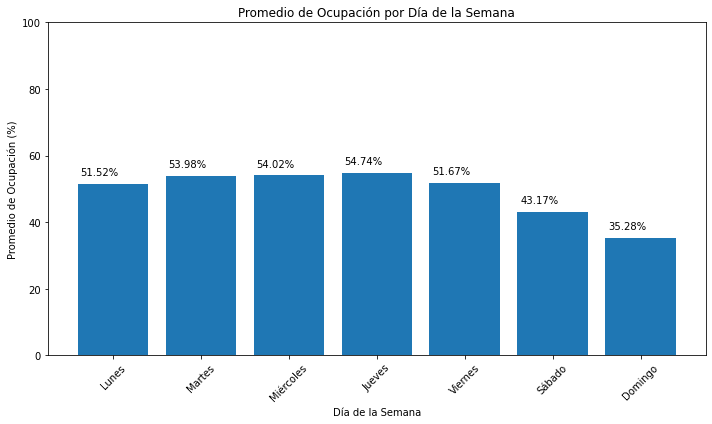

In [67]:
#Importamos libreria matplotlib para hacer gráficos
import matplotlib.pyplot as plt


# Nos aseguramos que la columna fecha este en formato fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer el día de la semana (0=Lunes, 1=Martes, ..., 6=Domingo)
df['Dia_de_la_semana'] = df['Fecha'].dt.dayofweek

# Calcular el promedio del porcentaje de ocupación por día de la semana
promedio_por_dia = df.groupby('Dia_de_la_semana')['Porcentaje_de_ocupación'].mean()

# Nombres de los días de la semana
nombres_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barras = plt.bar(nombres_dias, promedio_por_dia * 100)  # Multiplicar por 100 para mostrar como porcentaje
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio de Ocupación (%)')
plt.title('Promedio de Ocupación por Día de la Semana')

# Agregar los valores de porcentaje de ocupación en las barras
for barra, porcentaje in zip(barras, promedio_por_dia):
    plt.text(barra.get_x() + barra.get_width() / 2 - 0.15, barra.get_height() + 2, f'{porcentaje * 100:.2f}%', ha='center', va='bottom')

plt.ylim(0, 100)  # Establecer el rango del eje y de 0% a 100%
plt.xticks(rotation=45)  # Rotar los nombres de los días para mayor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()




In [74]:
#Queremos buscar el registro de hora, que se hizo mas tarde en algún dia, para separar los datos en AM y PM
df['Hora'] = df['LastUpdated'].dt.hour

# Encontrar la hora más tardía
hora_mas_tarde = df['Hora'].max()

# Mostrar la hora más tardía
print(f"La hora más tardía registrada es: {hora_mas_tarde}:00")


La hora más tardía registrada es: 16:00


In [76]:
# Función para etiquetar AM o PM según la hora
def etiquetar_am_pm(hora):
    if 7 <= hora.hour < 12:
        return 'AM'
    elif 12 <= hora.hour <= 16:
        return 'PM'
    else:
        return 'Otro'

# Aplicar la función para crear la nueva columna "AM_PM"
df['AM_PM'] = df['LastUpdated'].apply(etiquetar_am_pm)

df.head(10)


,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Porcentaje_de_ocupación,Fecha,Día_de_la_semana,Media_hora_exacta,time,Dia_de_la_semana,Hora,AM_PM
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,0.105719,2016-10-04,1,2016-10-04 08:00:00,08:00:00,1,7,AM
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,0.110919,2016-10-04,1,2016-10-04 08:30:00,08:30:00,1,8,AM
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,0.138648,2016-10-04,1,2016-10-04 09:00:00,09:00:00,1,8,AM
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,0.185442,2016-10-04,1,2016-10-04 09:30:00,09:30:00,1,9,AM
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,0.259965,2016-10-04,1,2016-10-04 10:00:00,10:00:00,1,9,AM
5,BHMBCCMKT01,577,177,2016-10-04 10:26:49,0.306759,2016-10-04,1,2016-10-04 10:30:00,10:30:00,1,10,AM
6,BHMBCCMKT01,577,219,2016-10-04 10:59:48,0.379549,2016-10-04,1,2016-10-04 11:00:00,11:00:00,1,10,AM
7,BHMBCCMKT01,577,247,2016-10-04 11:25:47,0.428076,2016-10-04,1,2016-10-04 11:30:00,11:30:00,1,11,AM
8,BHMBCCMKT01,577,259,2016-10-04 11:59:44,0.448873,2016-10-04,1,2016-10-04 12:00:00,12:00:00,1,11,AM
9,BHMBCCMKT01,577,266,2016-10-04 12:29:45,0.461005,2016-10-04,1,2016-10-04 12:30:00,12:30:00,1,12,PM


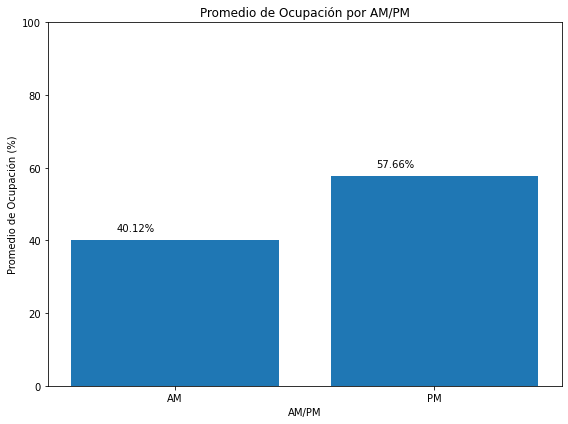

In [77]:

# Calcular el promedio del porcentaje de ocupación por AM_PM
promedio_por_am_pm = df.groupby('AM_PM')['Porcentaje_de_ocupación'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
barras = plt.bar(promedio_por_am_pm.index, promedio_por_am_pm * 100)  # Multiplicar por 100 para mostrar como porcentaje
plt.xlabel('AM/PM')
plt.ylabel('Promedio de Ocupación (%)')
plt.title('Promedio de Ocupación por AM/PM')

# Agregar los valores de porcentaje de ocupación en las barras
for barra, porcentaje in zip(barras, promedio_por_am_pm):
    plt.text(barra.get_x() + barra.get_width() / 2 - 0.15, barra.get_height() + 2, f'{porcentaje * 100:.2f}%', ha='center', va='bottom')

# Ajustar el rango del eje y para que sea de 0% a 100%
plt.ylim(0, 100)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


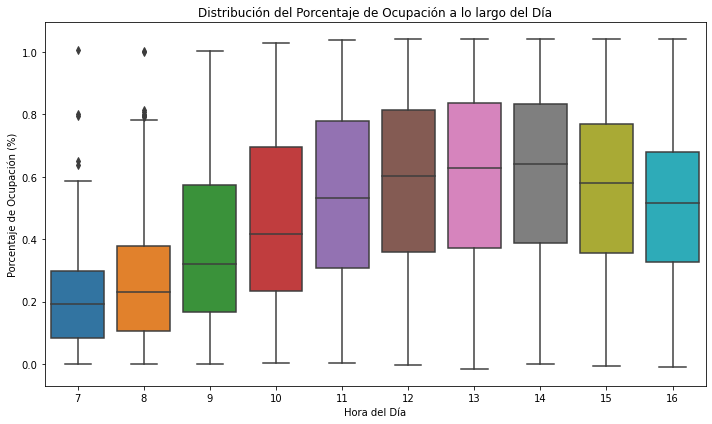

In [78]:

import seaborn as sns

# Crear una nueva columna con la hora del día
df['Hora_del_dia'] = df['LastUpdated'].dt.hour

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hora_del_dia', y='Porcentaje_de_ocupación', data=df)
plt.xlabel('Hora del Día')
plt.ylabel('Porcentaje de Ocupación (%)')
plt.title('Distribución del Porcentaje de Ocupación a lo largo del Día')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


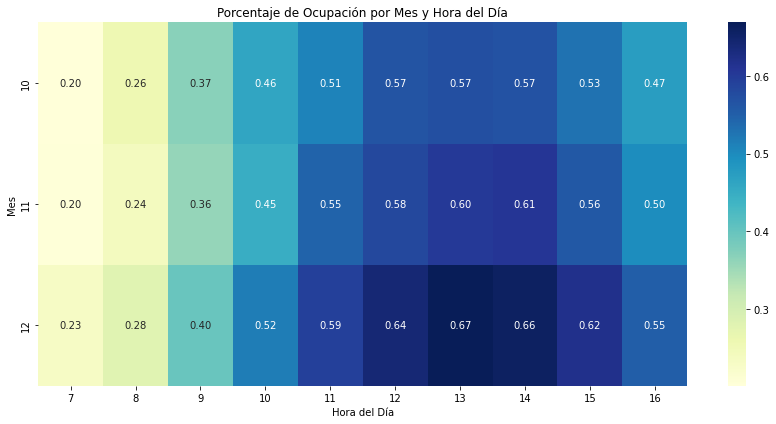

In [79]:
# Extraer el mes de la columna "Fecha"
df['Mes'] = df['Fecha'].dt.month

# Crear una tabla pivote para preparar los datos para el heatmap
tabla_pivote = df.pivot_table(index='Mes', columns='Hora_del_dia', values='Porcentaje_de_ocupación', aggfunc='mean')

# Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(tabla_pivote, cmap='YlGnBu', annot=True, fmt=".2f", cbar=True)
plt.xlabel('Hora del Día')
plt.ylabel('Mes')
plt.title('Porcentaje de Ocupación por Mes y Hora del Día')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


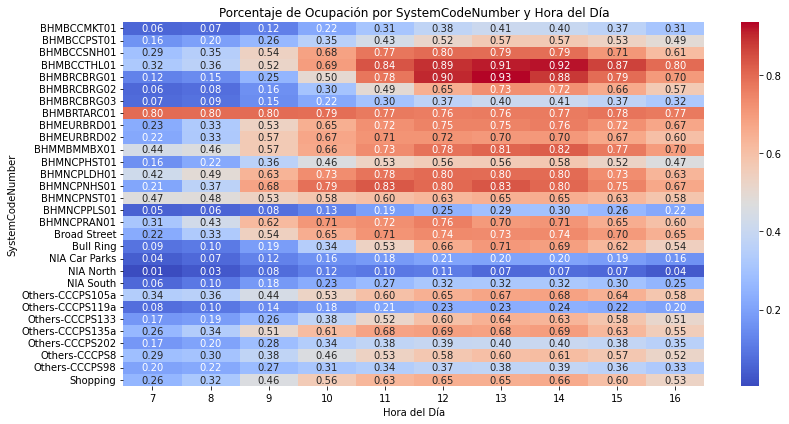

In [80]:


# Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.pivot_table(index='SystemCodeNumber', columns='Hora_del_dia', values='Porcentaje_de_ocupación', aggfunc='mean'),
            cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.xlabel('Hora del Día')
plt.ylabel('SystemCodeNumber')
plt.title('Porcentaje de Ocupación por SystemCodeNumber y Hora del Día')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


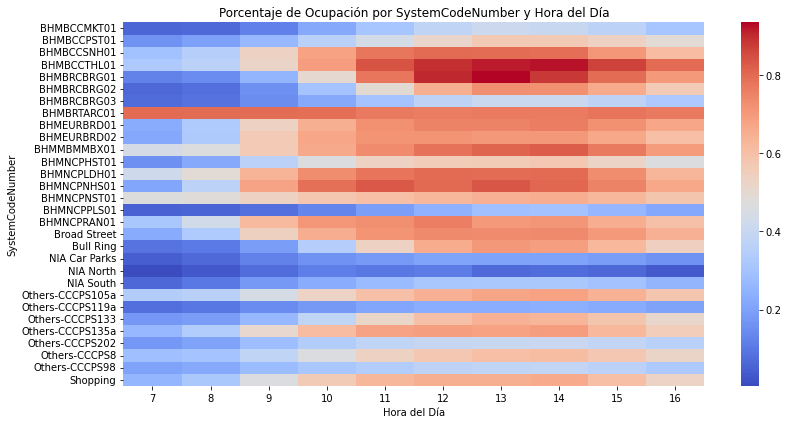

In [81]:

# Crear el heatmap sin los valores dentro de las celdas
plt.figure(figsize=(12, 6))
sns.heatmap(df.pivot_table(index='SystemCodeNumber', columns='Hora_del_dia', values='Porcentaje_de_ocupación', aggfunc='mean'),
            cmap='coolwarm', cbar=True)
plt.xlabel('Hora del Día')
plt.ylabel('SystemCodeNumber')
plt.title('Porcentaje de Ocupación por SystemCodeNumber y Hora del Día')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [87]:

# Encontrar el máximo porcentaje de ocupación
max_porcentaje = df['Porcentaje_de_ocupación'].max()

# Encontrar el "SystemCodeNumber" correspondiente al máximo porcentaje
system_code_max_porcentaje = df.loc[df['Porcentaje_de_ocupación'] == max_porcentaje, 'SystemCodeNumber'].values[0]

print(f"El SystemCodeNumber con el mayor porcentaje de ocupación es: {system_code_max_porcentaje}")




El SystemCodeNumber con el mayor porcentaje de ocupación es: BHMBCCTHL01


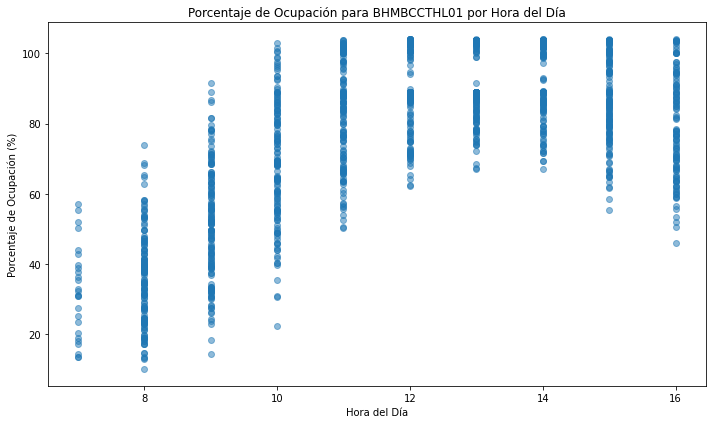

In [88]:

# Filtrar el DataFrame para el SystemCodeNumber deseado
system_code = "BHMBCCTHL01"
df_filtrado = df[df['SystemCodeNumber'] == system_code]

# Crear el scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado['Hora_del_dia'], df_filtrado['Porcentaje_de_ocupación'] * 100, alpha=0.5)
plt.xlabel('Hora del Día')
plt.ylabel('Porcentaje de Ocupación (%)')
plt.title(f'Porcentaje de Ocupación para {system_code} por Hora del Día')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
